**RNN LSTM en Keras**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Paramètres
max_features = 20000  # Nombre de mots les plus fréquents à considérer
maxlen = 100  # Couper les séquences après ce nombre de mots

In [ ]:
# Chargement du jeu de données IMDB
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Remplir les séquences à la même longueur
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Construction du modèle
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))  # Couche d'embedding
model.add(LSTM(64, return_sequences=False))  # Couche LSTM avec 64 unités
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie pour la classification binaire

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1]:
# Entraînement du modèle
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

NameError: name 'model' is not defined

In [ ]:
# Affichage du résumé du modèle
model.summary()

In [ ]:
# Évaluation du modèle
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8310 - loss: 0.8580
Test loss: 0.8603057265281677
Test accuracy: 0.8301600217819214


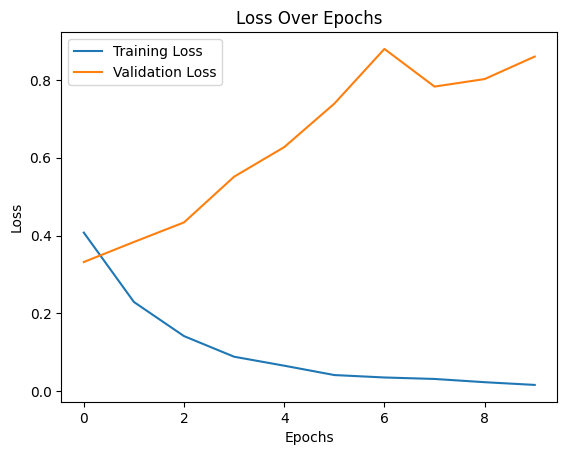

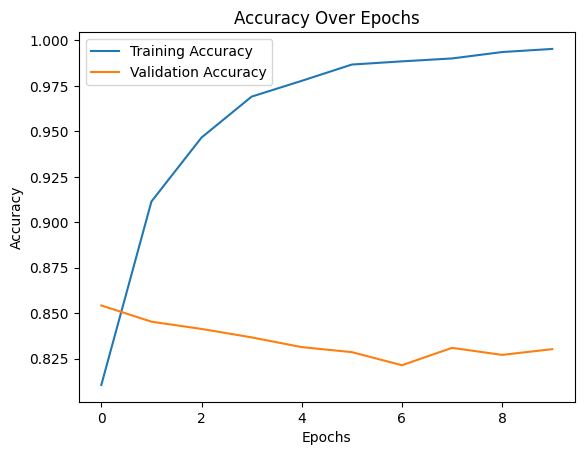

In [ ]:
# Tracé de la courbe de perte
# Tracé de la courbe de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracé de la courbe de précision
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step


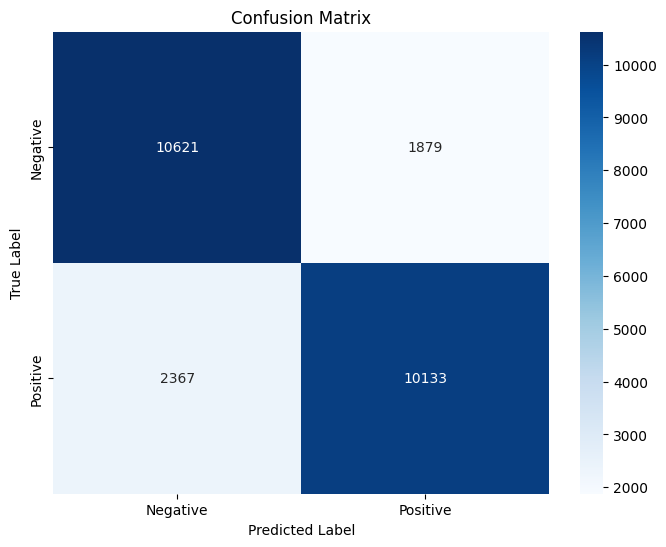

In [ ]:
# Prédictions du modèle sur les données de test
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Code pour Remédier au Surapprentissage**

# Regularisation L2 et Dropout :

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(64, return_sequences=False, kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping :

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights='true')

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 102ms/step - accuracy: 0.7164 - loss: 0.8611 - val_accuracy: 0.8438 - val_loss: 0.4113
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.8986 - loss: 0.3168 - val_accuracy: 0.8432 - val_loss: 0.3947
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.9227 - loss: 0.2623 - val_accuracy: 0.8422 - val_loss: 0.3965
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.9424 - loss: 0.2119 - val_accuracy: 0.8260 - val_loss: 0.4668


In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8441 - loss: 0.3958
Test loss: 0.39466777443885803
Test accuracy: 0.8432000279426575


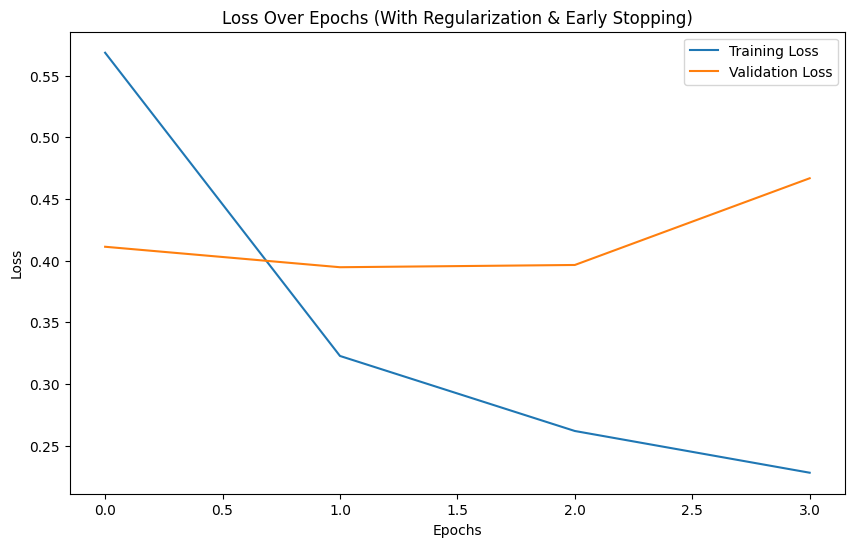

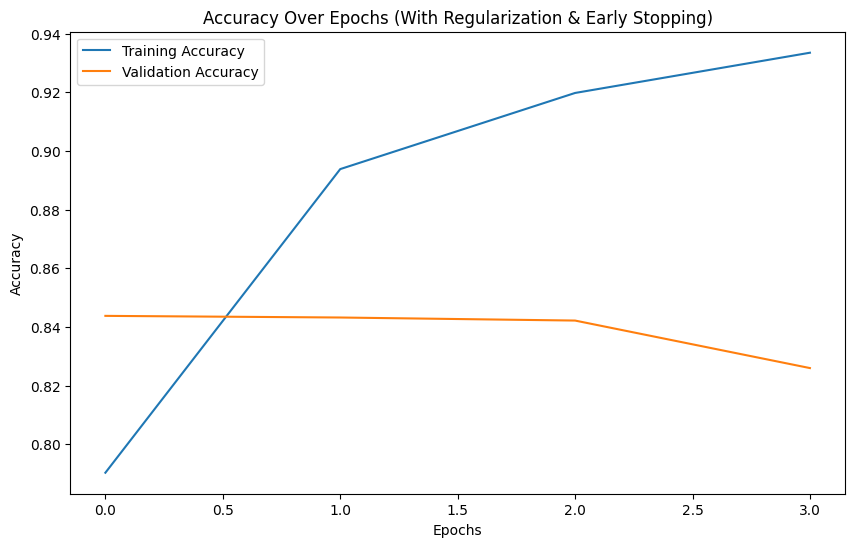

In [ ]:
# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs (With Regularization & Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs (With Regularization & Early Stopping)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
